In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('high_diamond_ranked_10min.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [7]:
# Checking if some duplicates exists
duplicated = df.duplicated(subset=['gameId'])
print(duplicated.any() ==1)

False


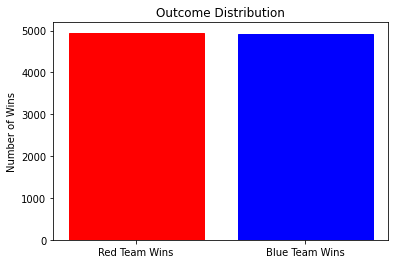

In [8]:
# Bar plot of the outcomes to see how they are distributed
labels = ['Red Team Wins', 'Blue Team Wins']
red_wins = len(df.blueWins[df['blueWins']==0])
blue_wins = len(df.blueWins[df['blueWins']==1])
wins = (red_wins,blue_wins)
fig = plt.figure()
barPlot = plt.bar(labels,wins)
plt.ylabel('Number of Wins')
plt.title('Outcome Distribution')
barPlot[0].set_color('red')
barPlot[1].set_color('blue')
plt.show()

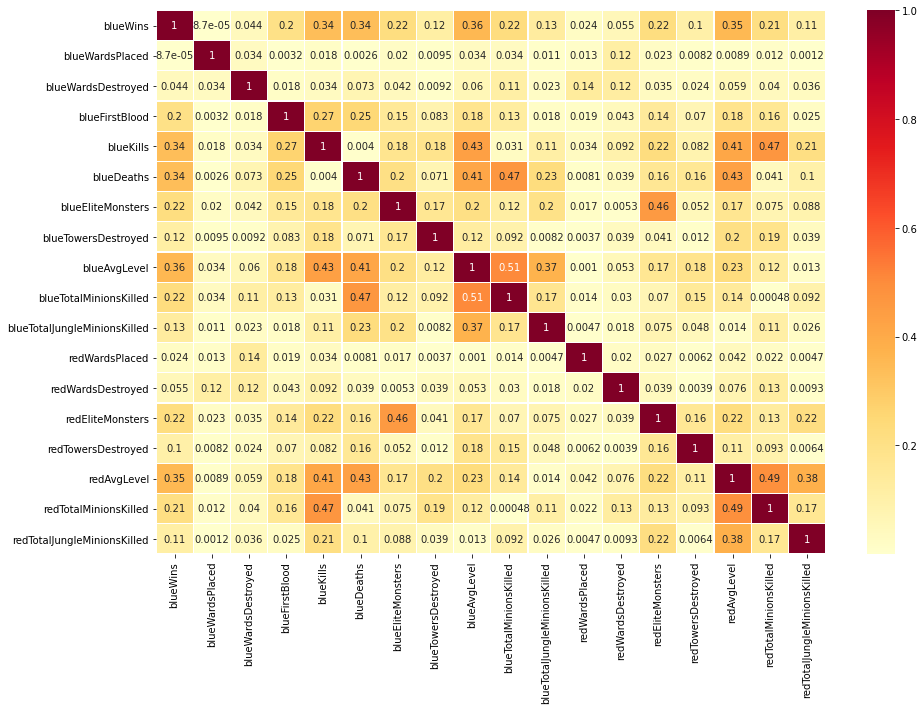

In [9]:
# Correlation matrix with absolute vals
correlation_mat = df.corr().abs()

# Getting upper triangle of correlation matrix
upper = correlation_mat.where(np.triu(np.ones(correlation_mat.shape), 
                                  k=1).astype(np.bool))


# Getting features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(
        upper[column] > 0.75)]

# Dropping those features 
X = df.drop(to_drop, axis=1)

# Two columns are removed manually since they are some subsets of others
X = X.drop(["blueHeralds"], axis = 1)
X = X.drop(["redHeralds"], axis = 1)

# Dropping the ID column
X = X.drop(["gameId"],axis=1)

# Plotting the new correlation matrix
correlation_mat_X = X.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat_X, annot = True, linewidths=.3, cmap ="YlOrRd")
plt.show()

In [10]:
# Dropping the features with less correlation with blueWins column
X = X.drop(["blueWardsPlaced", "blueWardsDestroyed",
           "blueTowersDestroyed", "blueTotalJungleMinionsKilled",
           "redWardsPlaced", "redWardsDestroyed",
           "redTowersDestroyed", "redTotalJungleMinionsKilled"], axis = 1)

In [11]:
# Independent and dependent variables
X = X.drop(['blueWins'], axis = 1)
Y = df["blueWins"]

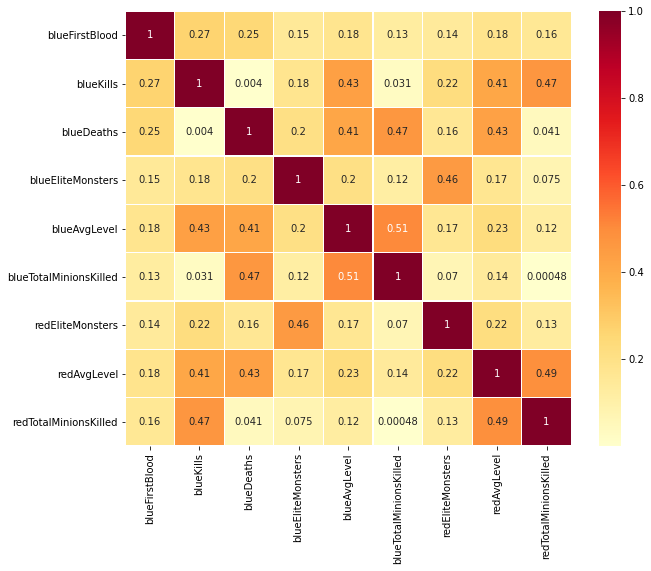

In [12]:
# Plotting the final correlation matrix
correlation_mat_X = X.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat_X, annot = True, linewidths=.3, cmap ="YlOrRd")
plt.show()

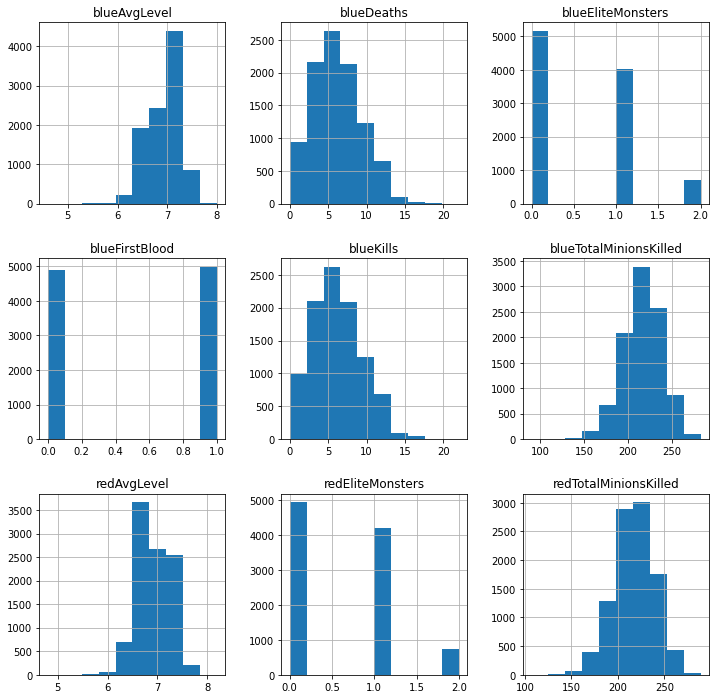

In [13]:
# Plotting the histograms of selected features
X.hist(figsize=(12,12))
plt.show()

In [14]:
# Splitting the data 
from sklearn.model_selection import train_test_split
testSize = 0.2
x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size=testSize)

In [15]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
logistic_prob = logistic.predict_proba(x_test)

In [16]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)
nb_prob = nb.predict_proba(x_test)

In [17]:
# SVC Model
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', probability=True,
          gamma='auto')
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
svc_prob = svc.predict_proba(x_test)

In [18]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
neighbors = int(np.sqrt(len(X)))
knn = KNeighborsClassifier(n_neighbors= neighbors)
knn.fit(x_train,y_train)
knn_predict = knn.predict(x_test)
knn_prob = knn.predict_proba(x_test)

In [19]:
# Random Guess
random = [1 for game in range(len(y_test))]

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
logistic_prob = logistic_prob[:,-1]
nb_prob = nb_prob[:,-1]
svc_prob = svc_prob[:,-1]
knn_prob = knn_prob[:,-1]

In [22]:
# ROC Curve
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, logistic_prob)
nb_fpr, nb_tpr, nb_thresholds                   = roc_curve(y_test, nb_prob)
svc_fpr, svc_tpr, svc_thresholds                = roc_curve(y_test, svc_prob)
knn_fpr, knn_tpr, knn_thresholds                = roc_curve(y_test, knn_prob)

In [23]:
# AUC Scores
logistic_auc = roc_auc_score(y_test, logistic_prob)
nb_auc = roc_auc_score(y_test, nb_prob)
svc_auc = roc_auc_score(y_test, svc_prob)
knn_auc = roc_auc_score(y_test, knn_prob)
random_auc = roc_auc_score(y_test, random)

In [24]:
from tabulate import tabulate

In [25]:
auc_table = [
['Logistic Regression   ', logistic_auc],
['Naive Bayes', nb_auc ],
['KNN', svc_auc ],
['SVC',knn_auc],
['Random', random_auc]
] 
print (tabulate(auc_table, headers=["Model", "AUC Score"]))

Model                  AUC Score
-------------------  -----------
Logistic Regression     0.801712
Naive Bayes             0.794381
KNN                     0.713912
SVC                     0.733126
Random                  0.5


Logistic Regression and Naive Bayes models are expected to perform better because of the higher AUC Score

In [26]:
# Best threshold for Logistic Regression Model
equation_logistic = np.sqrt(logistic_tpr * (1-logistic_fpr))
index_logistic = np.argmax(equation_logistic)
print('Best Threshold for Logistic Regression Model: %f' % (logistic_thresholds[index_logistic]))

Best Threshold for Logistic Regression Model: 0.484634


In [27]:
# Best threshold for Naive Bayes Model
equation_nb = np.sqrt(nb_tpr * (1-nb_fpr))
index_nb = np.argmax(equation_nb)
print('Best Threshold for Naive Bayes Model: %f' % (nb_thresholds[index_nb]))

Best Threshold for Naive Bayes Model: 0.575352


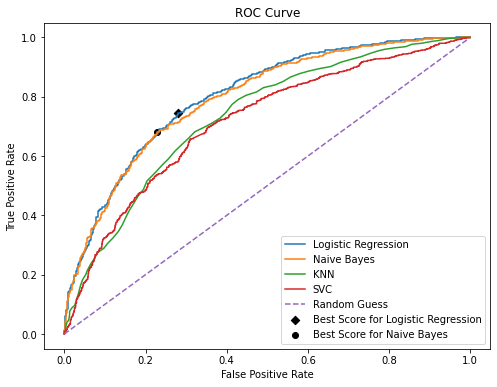

In [28]:
# Plotting the ROC Curve for models
plt.figure(figsize=(8,6))
plt.plot(logistic_fpr,logistic_tpr, linestyle = '-', label = 'Logistic Regression')
plt.plot(nb_fpr,nb_tpr,  label = 'Naive Bayes')
plt.plot(knn_fpr,knn_tpr, label = 'KNN')
plt.plot(svc_fpr,svc_tpr,  label = 'SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.scatter(logistic_fpr[index_logistic], logistic_tpr[index_logistic], marker='D', color='k',
            label='Best Score for Logistic Regression')
plt.scatter(nb_fpr[index_nb], nb_tpr[index_nb], marker='o', color='k', label='Best Score for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [29]:
# Logistic Regression Model predictions
logistic_prediction = []
for i in logistic_prob:
    if i>= logistic_thresholds[index_logistic]:
        i = 1
        logistic_prediction.append(i)
    else:
        i=0
        logistic_prediction.append(i)

In [30]:
# Naive Bayes Model predictions
nb_predict = []
for i in logistic_prob:
    if i>= nb_thresholds[index_nb]:
        i = 1
        nb_predict.append(i)
    else:
        i=0
        nb_predict.append(i)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [32]:
# Accuracy, Precision, and Recall Scores of Logistic Regression Model 
logistic_acc    = accuracy_score(logistic_prediction, y_test)
logistic_prec   = precision_score(logistic_prediction, y_test)
logistic_recall = recall_score(logistic_prediction, y_test)

# Accuracy, Precision, and Recall Scores of Naive Bayes Model 
nb_acc    = accuracy_score(nb_predict, y_test)
nb_prec   = precision_score(nb_predict, y_test)
nb_recall = recall_score(nb_predict, y_test)

# Accuracy, Precision, and Recall Scores of KNN Model
knn_acc    = accuracy_score(knn_predict, y_test)
knn_prec   = precision_score(knn_predict, y_test)
knn_recall = recall_score(knn_predict, y_test)

# Accuracy, Precision, and Recall Scores of SVC Model
svc_acc    = accuracy_score(svc_predict, y_test)
svc_prec   = precision_score(svc_predict, y_test)
svc_recall = recall_score(svc_predict, y_test)

# Accuracy, Precision, and Recall Scores of Random Guess
random_acc    = accuracy_score(random, y_test)
random_prec   = precision_score(random, y_test)
random_recall = recall_score(random, y_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
# Confusion Matrix for Logistic Regression Model
logistic_tn, logistic_fp, logistic_fn, logistic_tp = confusion_matrix(
        y_test, logistic_prediction).ravel()

# Confusion Matrix for Naive Bayes Model
nb_tn, nb_fp, nb_fn, nb_tp = confusion_matrix(
        y_test, nb_predict).ravel()

# Confusion Matrix for KNN Model
knn_tn, knn_fp, knn_fn, knn_tp = confusion_matrix(
        y_test, knn_predict).ravel()


# Confusion Matrix for SVC Model
svc_tn, svc_fp, svc_fn, svc_tp = confusion_matrix(
        y_test, svc_predict).ravel()

# Confusion Matrix for Random Guess
random_tn, random_fp, random_fn, random_tp = confusion_matrix(
        y_test, random).ravel()

In [35]:
table = [
['Logistic Regression   ', logistic_acc, logistic_prec, logistic_recall, logistic_tp, logistic_fp, logistic_tn, logistic_fn],
['Naive Bayes'           , nb_acc      , nb_prec      , nb_recall      , nb_tp      , nb_fp      , nb_tn      , nb_fn      ],
['KNN'                   , knn_acc     , knn_prec     , knn_recall     , knn_tp     , knn_fp     , knn_tn     , knn_fn     ],
['SVC'                   , svc_acc     , svc_prec     , svc_recall     , svc_tp     , svc_fp     , svc_tn     , svc_fn     ],
['Random Guess'          , random_acc  , random_prec  , random_recall  , random_tp  , random_fp  , random_tn  , random_fn  ]
        ] 
print (tabulate(table, headers=["Model", "Accuracy", "Precision", "Recall",
                               "TP", "FP", "TN", "FN"]))

Model                  Accuracy    Precision    Recall    TP    FP    TN    FN
-------------------  ----------  -----------  --------  ----  ----  ----  ----
Logistic Regression    0.732287     0.745098  0.719124   722   282   725   247
Naive Bayes            0.718623     0.630547  0.755253   611   198   809   358
KNN                    0.680162     0.682147  0.671066   661   324   683   308
SVC                    0.668522     0.665635  0.660861   645   331   676   324
Random Guess           0.490385     1         0.490385   969  1007     0     0
